**Information:** *Some common concepts in the process of training and generalization*

**Written by:** *Zihao Xu*

**Last update date:** *06.12.2021*

# Motivation
- As shown in the notebook about *linear regression*, there could be many different training results with different models. That naturally leads to some simple ideas:
    - How to evaluate the performance of a trained model?
    - How to get the best performance given a limited dataset?
    - ...


- Here list some common concepts and simple techniques related to the topics above.

# Generalization: Capacity, Underfitting and Overfitting

## Training and Generalization

### Goal of Training
- Learn the **true relationships** (or **true patterns**) from some data pairs $$(\mathbf{x}_i,y_i),i=1,2,\cdots,N$$


- What we learn needs to **generalize** beyond the training data

### Definition of Generalization
- The trained model should perform well on **new, previously unseen** inputs


- The ability to perform well on previously unobserved inputs is called **generalization**

### Training error and Generalization error
- Typically, when training a machine learning model, we have access to a training set
    - In an **optimization** problem, we only cares reducing some error computed on the training set, called **training error**
    - In a **machine learning** problem, we would also like to make the expected value of the error on a new input, called **generalization error** to be low as well


- Problematically, we can never calculate the generalization error exactly. We typically **estimate** the generalization error of a machine learning model by measuring its performance on a **test set** of examples that were collected separately from the training set. This is called the **test error**.


- Take the linear regression as an example, the model is trained by minimizing the training error: $$\frac{1}{m^{(\text{train})}}\left\|\mathbf{X}^{(\text{train})}\mathbf{w}-\mathbf{y}^{(\text{train})}\right\|$$ However, what we actually care about is the test error: $$\frac{1}{m^{(\text{test})}}\left\|\mathbf{X}^{(\text{test})}\mathbf{w}-\mathbf{y}^{(\text{test})}\right\|$$

## Statistical Learning Theory

### Motivation
- To affect performance on the test set when we can observe only the training set, we would be able to make some progress if we are allowed to make some assumptions about how the training and test set are collected


### The i.i.d. assumptions
- **Data-generating process**:
    - The training and test data are generated by a probability distribution over datasets called the data-generating process


- **i.i.d. assumption**:
    - The examples in each dataset are **independent** from each other
    - The training set and test set are **identically distributed**, drawn from the same probability distribution as each other


### Guidance on Machine Learning
- The **expected training error of a randomly selected model is equal to the expected test error** of that model. 
    - Given a probability distribution $p(\mathbf{x},y)$ which we sample from repeatedly to generate the training set and the test set, the expected training set error is exactly the same as the expected test set error for some fixed parameters $\boldsymbol{\theta}$


- In machine learning, we sample the training set, then use it to choose the parameters to reduce training set error, then sampling the test set. Under this process, the expected test error is greater than or equal to the expected value of training error.


- Therefore, the factors determining **how well a machine learning algorithm will perform** are its ability to
    - Make the training error small
    - Make the gap between training and test error small


- These two factors correspond to two challenges in machine learning are:
    - **Underfitting**: The model is not able to obtain a sufficient low error value on the training set
    - **Overfitting**: The gap between the training error and the test error is too large

## Model Capacity

- Informally, a model's capacity is its ability to fit a wide variety of functions
    - Models with low capacity may struggle to fit the training set
    - Models with high capacity can overfit by memorizing properties of the training set that do no serve them well on the test set
    - Difficult to compare the complexity among members of substantially different model classes


- There are many factors affecting the model capacity
    - Number of features and corresponding parameters
    - Family of functions the learning algorithm can choose from
    - ...


- Basic ideas about improving the generalization: **Occam's razor**:
    - Among competing hypothesis that explain known observations equally well, we should choose the "simplest" one


- Typically, generalization error has a U-shaped curve as a function of model capacity. 


Here is a simple figure from *Dive into deep learning*

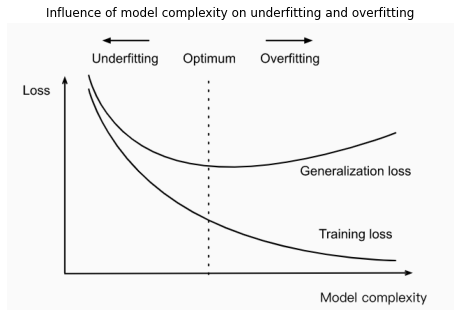

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./Figures/Loss_vs_capacity.png')
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img)
ax.axis('off')
ax.set_title("Influence of model complexity on underfitting and overfitting")
plt.show()

## Dataset Size
- Dataset size is another important factor which tend to the influence the generalizability of a model. For a fixed model:
    - The fewer samples we have in the training dataset, the more likely we are to encounter overfitting
    - As we increase the amount of data, the generalization error typically decreases. (**More data never hurt**)


- For a fixed task and data distribution, there is typically a relationship between model complexity and dataset size
    - Given more data, we might profitably attempt to fit a more complex model
    - Absent sufficient data, simpler models may be more difficult to beat

## Hyper-parameters and Validation Sets
### Hyper-parameters
- Most machine learning algorithms have hyper-parameters, settings that we can use to control the algorithm's behavior
    - The values of hyper-parameters are not adapted by the learning algorithm itself
    - For example, the **polynomial regression** has a single hyper-parameter: the degree of the polynomial which acts as a **capacity hyper-parameter**


- For most hyper-parameters, it is not appropriate to learn them on the training set

### Validation set
- **Motivation**:
    - On one hand, it is important that the test examples are not used in any way to make choices about the model, including its hyper-parameters. If we use the test data in the model selection process, there is a risk that we might overfit the test data.
    - On the other hand, we cannot rely solely on the training data for choosing hyper-parameters because we cannot estimate the generalization error on the very data that we use to train the model.


- **Solution**:
    - Split the training data into two disjoint subsets
    - The subset of data used to learn the parameters is still typically called the **training set**
    - The subset of data used to guide the selection of hyper-parameters is called the **validation set**
    - Typically, one uses about $80\%$ of the training data for training and $20\%$ for validation


- **Remark**:
    - Since the validation set is used to "train" the hyper-parameters, the validation set error will underestimate the generalization error
    - In this notebook, the data to be worked with are actually **training data** and **validation data** with no true test sets. The reported accuracy in each experiment is really the validation accuracy and not a true test set accuracy.

### K-Fold Cross-Validation
- **Motivation**:
    - When the training data is scarce, we might not even be able to afford to hold out enough data to constitute a proper validation set


- **Solution**:
    - Split the original training data into $K$ non-overlapping subsets
    - Execute the training and validation process $K$ times, each time training on $K-1$ subsets and validating on a different subset
    - The training and validation errors are estimated by averaging over the results from the $K$ experiments

## Estimators, Bias and Variance
Foundational concepts such as parameter estimation, bias and variance are useful to **formally characterize** notions of generalization, underfitting and overfitting

### Point Estimation
- Let $\{\mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\}$ be a set of $m$ independent and identically distributed data points. A **point estimator** (or **statistic**) is any function of the data
$$\hat{\boldsymbol{\theta}}_m=g(\mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)})$$
    - The definition does not require that $g$ return a value that is close to the true $\boldsymbol{\theta}$ or even that the range of $g$ be the same as the set of allowable values of $\boldsymbol{\theta}$
    - A good estimator is a function whose output is close to the true underlying $\boldsymbol{\theta}$ that generated from the training data


- Assume that the true parameter value $\boldsymbol{\theta}$ is fixed but unknown, while the point estimate $\hat{\boldsymbol{\theta}}$ is a function of the data. Since the **data is drawn from a random process**, any function of the data is random. Therefore, $\hat{\boldsymbol{\theta}}$ is a **random variable**.

### Bias
- The **bias** of an estimator is defined as
$$
\text{bias}\left(\hat{\boldsymbol{\theta}}_m\right)=\mathbb{E}\left(\hat{\boldsymbol{\theta}}_m\right)-\boldsymbol{\theta}
$$
where the expectation is over the data (seen as samples from a random variable) and $\boldsymbol{\theta}$ is the true underlying value of $\boldsymbol{\theta}$ used to define the data-generating distribution.
    - An estimator $\hat{\boldsymbol{\theta}}_m$ is said to be **unbiased** if $\text{bias}\left(\hat{\boldsymbol{\theta}}_m\right)=\mathbf{0}$, which implies that $\mathbb{E}\left(\hat{\boldsymbol{\theta}}_m\right)=\boldsymbol{\theta}$
    - An estimator $\hat{\boldsymbol{\theta}}_m$ is said to be **asymptotically unbiased** if $\text{lim}_{m\rightarrow\infty}\text{bias}\left(\hat{\boldsymbol{\theta}}_m\right)=\mathbf{0}$, which implies that $\text{lim}_{m\rightarrow\infty}\mathbb{E}\left(\hat{\boldsymbol{\theta}}_m\right)=\boldsymbol{\theta}$


- While unbiased estimators are clearly desirable, they are not always the **best** estimators.

### Variance
- The **variance** of an estimator is just the variance
$$
\mathbb{V}\left(\hat{\boldsymbol{\theta}}_m\right)
$$
where the random variable is the training set.


- The variance of an estimator provides a measure of how we would expect the estimate we compute from data to vary as we independently resample the dataset from the underlying data-generating process. 


- Just as we might like an estimator to exhibit low bias, we would also like it to have relatively low variance.


- We often estimate the generalization error by computing the sample mean of the error on the test set. The number of examples in the test set determines the accuracy of the estimate. Taking advantage of the **central limit theorem**, we can use the standard error to compute the probability that the true expectation falls in any chosen interval.

### Trading off Bias and Variance
- **Motivation**
    - Low variance algorithms tend to be **less complex**, with simple or rigid underlying structure
    - Low bias algorithms tend to be **more complex**, with flexible underlying structure
    - Algorithms that are not complex enough produce **underfit** models that can't learn the signal from the data
    - Algorithms that are too complex produce **overfit** models that memorize the noise instead of the signal


- **Performance**
    - **High bias**, low variance algorithms train models that are consistent, but inaccurate on *average*
    - **High variance**, low bias algorithms train models that are accurate on average, but inconsistent


- **Total Error**
    - To get good predictions, find a balance of Bias and Variance that minimizes **total error** $$\text{Total Error}=\text{Bias}^2+\text{Variance}+\text{Irreducible Error}$$ where the irreducible error is "noise" that can't be reduced by algorithms


Here is a figure showing the relationship between model capacity, bias and variance, from the *MIT Deep Learning Book*.

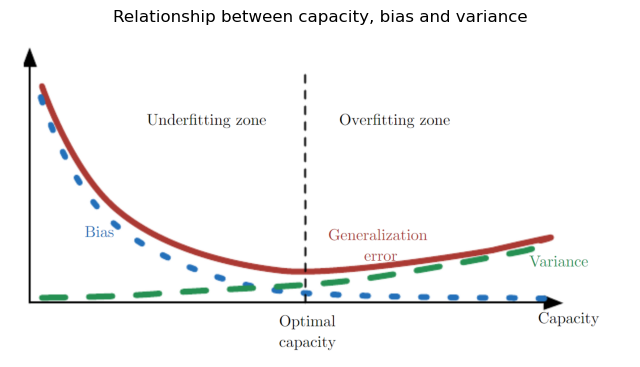

In [2]:
img = Image.open('./Figures/Trading_off_Bias_and_Variance.png')
fig, ax = plt.subplots(figsize=(8, 6),dpi=100)
ax.imshow(img)
ax.axis('off')
ax.set_title("Relationship between capacity, bias and variance")
plt.show()

### Consistency
- The behavior of an estimator as the amount of training data grows is also concerned. In particular, we usually wish that, as the number of data points $m$ in our dataset increases, out point estimates converge to the true value of the corresponding parameters. More formally, we would like that $$ \text{plim}_{m\rightarrow\infty}\hat{\theta}_m=\theta $$ The symbol $\text{plim}$ indicates convergence in probability, meaning that for any $\epsilon>0$: $$P\left(\left|\hat{\theta}-\theta\right|>\epsilon\right)\rightarrow0\text{ as }m\rightarrow\infty$$ This property is known as **consistency**


- Consistency ensures that the bias induced by the estimator **diminishes** as the number of data examples grows. However, the reverse is not true - asymptotic unbiasedness does not imply consistency

%%latex
\newpage

# Regularization

## Basic Concepts
### Definition in MIT Deep Learning Book

- **Any modification** we make to a learning algorithm that is intended to **reduce its generalization error** but not its training error
    - Put extra constraints on a machine learning model such as adding restrictions on the parameter
    - Add extra terms in the objective function that can be thought of as corresponding to a soft constraint on the parameters
    - ...
    
### Meaning of the additional terms and constraints

- Sometimes be designed to encode specific kinds of **prior knowledge**


- Sometimes be designed to express a generic **preference for a simpler model** class in order to promote generalization


- Sometimes necessary to make an underdetermined problem determined


- ...

### Regularization Strategy

- Most regularization strategies are based on regularizing estimators


- An effective regularization of an estimator works by **trading increased bias for reduced variance**, which means reducing variance significantly while not overly increasing the bias

### Rule of thumb

- Controlling the complexity of the model is not a simple matter of finding the model of the right size, with the right number of parameters


- The best fitting model in the sense of minimizing generalization error is **a large model that has been regularized appropriately**

### Common Methods
- Parameter Norm Penalties


- Dataset Augmentation


- Noise Robustness


- Early Termination


- Parameter Tying and Parameter Sharing


- Dropout

## Parameter Norm Penalties
### Intuition
- Among all functions $f$, the function $f=0$ (assigning the value $0$ to all inputs) is in some sense the **simplest**


- Control the complexity of a function by restricting its *distance* from zero

### Norm Penalties
- **Definition**
    - Add a parameter norm penalty $\Omega\left(\boldsymbol{\theta}\right)$ to the objective function $L$. The regularized objective function is denoted by $$\tilde{L}\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)=L\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)+\alpha\Omega\left(\boldsymbol{\theta}\right)$$ where $\alpha\in[0,\infty)$ is a hyper-parameter that weights the relative contribution of the norm penalty term, $\Omega$, relative to the standard objective function $L$.
    - Setting $\alpha$ to $0$ results in no regularization while larger values of $\alpha$ correspond to more regularization
    - Different choices for the norm $\Omega$ can result in different solutions being preferred


- **Remark**
    - In Neural Networks, typically only the **weights** of the affine transformation at each layer are regularized by the parameter norm
    - Each bias controls only a single variable, which do not leads to too much variance when not regularized
    - Regularizing the bias parameters can introduce a significant amount of underfitting
    - That why we usually separate the parameter $\boldsymbol{\theta}$ into weights $\mathbf{w}$ and biases $\mathbf{b}$ in Neural Networks

### $L^2$ Parameter Regularization
- **Definition**
    - Add a regularization term $$\Omega(\boldsymbol{\theta})=\frac{1}{2}\left\|\boldsymbol{\theta}\right\|^2_2$$
        - One of the **simplest** and **most common** kinds of parameter norm penalty
        - Commonly known as **Weight Decay**, **Ridge Regression** or **Tikhonov Regularization**
        - Encourages small parameter values


- **Behavior**
    - Remark: For convenience, here the **denominator layout notation** is used, where the scalar-to-vector derivative is written to be a column vector. 
    - With the regularized objective function $$\begin{aligned}\tilde{L}\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)&=L\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)+\frac{\alpha}{2}\left\|\boldsymbol{\theta}\right\|^2_2\\&=L\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)+\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}\end{aligned}$$ The corresponding parameter gradient is $$\nabla_{\boldsymbol{\theta}}\tilde{L}\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)=\nabla_{\boldsymbol{\theta}}L\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)+\alpha\boldsymbol{\theta}$$ To take a single gradient step to update the parameters $$\boldsymbol{\theta}\leftarrow\boldsymbol{\theta}-\epsilon\left(\nabla_{\boldsymbol{\theta}}L\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)+\alpha\boldsymbol{\theta}\right)$$ That is to say $$\boldsymbol{\theta}\leftarrow\left(1-\epsilon\alpha\right)\boldsymbol{\theta}-\epsilon\nabla_{\boldsymbol{\theta}}L\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)$$ The addition of the regularization term has modified the learning rule to multiplicatively shrink the parameter vector by a constant factor on each step
    - In the neighborhood of the value of the parameters that obtains minimal unregularized training cost $$\boldsymbol{\theta}^*=\text{arg}\text{min}_{\boldsymbol{\theta}}L(\boldsymbol{\theta})$$ Make a quadratic approximation to the objective function $$\hat{L}\left(\boldsymbol{\theta}\right)=L\left(\boldsymbol{\theta}^*\right)+\frac{1}{2}\left(\boldsymbol{\theta}-\boldsymbol{\theta}^*\right)^T\mathbf{H}\left(\boldsymbol{\theta}-\boldsymbol{\theta}^*\right)$$ where $\mathbf{H}$ is the Hessian matrix of $L$ with respect to $\boldsymbol{\theta}$ evaluated at $\boldsymbol{\theta}^*$. Here is the minimum where the gradient vanishes, so there is no first-order term in this approximation and $\mathbf{H}$ is bound to be positive semidefinite. Mentioning that a Hessian matrix is always symmetric if the function is continuous, the minimum of $\hat{L}$ occurs where its gradient is equal to zero $$\nabla_{\boldsymbol{\theta}}\hat{L}\left(\boldsymbol{\theta}\right)=\mathbf{H}\left(\boldsymbol{\theta}-\boldsymbol{\theta}^*\right)=0$$ By adding the regularization term, the equation becomes $$\begin{aligned}\alpha\tilde{\boldsymbol{\theta}}+\mathbf{H}\left(\tilde{\boldsymbol{\theta}}-\boldsymbol{\theta}^*\right)&=0\\\tilde{\boldsymbol{\theta}}&=\left(\mathbf{H}+\alpha\mathbf{I}\right)^{-1}\mathbf{H}\boldsymbol{\theta}^*\end{aligned}$$ As $\alpha$ approaches $0$, the regularized solution $\tilde{\boldsymbol{\theta}}$ approaches $\boldsymbol{\theta}^*$. To see what happens with a large $\alpha$, decompose the real and symmetric Hessian matrix $$\mathbf{H}=\mathbf{Q}\boldsymbol{\Lambda}\mathbf{Q}^T$$ where $\mathbf{Q}$ is orthonormal and $\boldsymbol{\Lambda}$ is diagonal. Then we can get $$\begin{aligned}\tilde{\boldsymbol{\theta}}&=\left(\mathbf{Q}\boldsymbol{\Lambda}\mathbf{Q}^T+\alpha\mathbf{I}\right)^{-1}\mathbf{Q}\boldsymbol{\Lambda}\mathbf{Q}^T\boldsymbol{\theta}^*\\&=\left[\mathbf{Q}\left(\boldsymbol{\Lambda}+\alpha\mathbf{I}\right)\mathbf{Q}^T\right]^{-1}\mathbf{Q}\boldsymbol{\Lambda}\mathbf{Q}^T\boldsymbol{\theta}^*\\&=\mathbf{Q}\left(\boldsymbol{\Lambda}+\alpha\mathbf{I}\right)^{-1}\boldsymbol{\Lambda}\mathbf{Q}^T\boldsymbol{\theta}^*\end{aligned}$$ The effect of the regularization term is to rescale $\boldsymbol{\theta}^*$ along the axis defined by the eigenvectors of $\mathbf{H}$. Specifically, the component of $\boldsymbol{\theta}^*$ that is aligned with the $i$-th eigenvector of $\mathbf{H}$ is rescaled by a factor of $\frac{\lambda_i}{\lambda_i+\alpha}$ This means the effect is relatively small when $\lambda_i\gg\alpha$ and components will be shrunk to have nearly zero magnitude when $\lambda\ll\alpha$.
    - Only directions along which the parameters contribute significantly to reducing the objective function are preserved relatively intact.


- **Performance in Linear Regression**
    - In Linear Regression, the regularized loss function is $$L\left(\boldsymbol{\theta}\right)=\left(\tilde{\mathbf{X}}\boldsymbol{\theta}-\mathbf{y}\right)^T\left(\tilde{\mathbf{X}}\boldsymbol{\theta}-\mathbf{y}\right)+\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}$$ The normal equation becomes $$\boldsymbol{\theta}=\left(\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}+\alpha\mathbf{I}\right)^{-1}\tilde{\mathbf{X}}^T\mathbf{y}$$ Intuitively, the $L^2$ regularization causes the learning algorithm to "perceive" the input as having higher variance, which make it shrink the weights on features whose covariance with the output target is lower
    - We can interpret the **Moore-Penrose pseudoinverse** as stabilizing underdetermined problems using regularization
    - Underdetermined problems: $\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}$ is singular due to lack of variance in some direction


### $L^1$ Regularization
- **Definition**
    - Add the regularization term $$\Omega\left(\boldsymbol{\theta}\right)=\left\|\boldsymbol{\theta}\right\|_1=\underset{i=1}{\Sigma}\left|\theta_i\right|$$
    - Commonly known as **Lasso Regression**
    - Encourages **sparsity** in the parameters
    - Be used for **feature selection**


- **Behavior**
    - With the regularized objective function $$\tilde{L}\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)=L\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)+\alpha\left\|\boldsymbol{\theta}\right\|_1$$ The corresponding parameter gradient is $$\nabla_{\boldsymbol{\theta}}\tilde{L}\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)=\nabla_{\boldsymbol{\theta}}L\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)+\alpha\text{sign}\left(\boldsymbol{\theta}\right)$$ It's obvious that the effect of $L^1$ regularization is quite different from that of $L^2$ regularization. The regularization contribution to the gradient no longer scales linearly with each $\theta_i$; instead it is a constant factor with a sign equal to $\text{sign}\left(\theta_i\right)$, which prevents us from getting a clean algebraic solution to quadratic approximations and enables it to encourage sparsity

### Norm Penalties as Constrained Optimization
- **Penalties**
    - If we want to constrain $\Omega\left(\boldsymbol{\theta}\right)$ to be less than some constant $k$, construct a **generalized Lagrange function** $$\mathcal{L}\left(\boldsymbol{\theta},\alpha;\mathbf{X},\mathbf{y}\right)=L\left(\boldsymbol{\theta};\mathbf{X},\mathbf{y}\right)+\alpha\left(\Omega\left(\boldsymbol{\theta}\right)-k\right)$$ The solution to the constrained problem is given by $$\boldsymbol{\theta}^*=\text{arg }\underset{\boldsymbol{\theta}}{\text{min }}\underset{\alpha,\alpha>0}{\text{max}}\mathcal{L}\left(\boldsymbol{\theta},\alpha\right)$$ Thus turning a constrained optimization problem into unconstrained optimization problem
    - While we do not know the exact size of the constraint region, we can control it roughly by increasing or decreasing $\alpha$ in order to grow or shrink the constraint region
    - Sometimes cause non-convex optimization procedures to get stuck in local minima corresponding to small $\boldsymbol{\theta}$


- **Explicit constraints**
    - Take steps downhill on $L(\boldsymbol{\theta})$ and then project $\boldsymbol{\theta}$ back to the nearest point that satisfies $\Omega\left(\boldsymbol{\theta}\right)<k$
    - Useful if we have an idea of what value of $k$ is appropriate and do not want to spend time searching for the value of $\alpha$ that corresponds to $k$
    - Unlike penalties, do not encourage the parameters to approach the origin
    - Impose some stability on the optimization procedure

## Dataset Augmentation
### Motivation

- Training a machine learning model on more data makes it generalize better


- The amount of data we have is limited

### Solution

- Create fake data and add it to the training set


- Heavily depends on what the machine learning task is
    - Easily Transform data for a classifier, which should be invariant to a wide variety of transformations
    - Difficult to generate fake data for a density estimation task

### Remark

- Data Augmentation is a particularly effective technique for a specific classification problem: **object recognition**
    - Rotating, scaling, ...


- Be careful not to apply transformations that would change the correct class
    - Horizontal flips is not appropriate for recognizing the difference between "b" and "d"


- One way to express our **prior knowledge** about some invariance existing in the data

## Noise Robustness
### Motivation
- Adding noises to inputs as a dataset augmentation strategy

### Solutions
- Add noises with infinitesimal variance at the input of the model
    - Sometimes equivalent to imposing a penalty on the norm of the weights
    - In general, noise injection can be much more powerful than simply shrinking parameters


- Add noises to the parameters
    - Can be interpreted as a stochastic implementation of Bayes inference over the parameters
    - In some cases is equivalent to a more traditional form of regularization, encouraging stability of the function to be learned


- Inject noise at the output targets
    - Explicitly model the noise on the labels to prevent some mistakes in the labels, which is common in most datasets
    - E.g. assume that for some small constant $\epsilon$, the training set label $y$ is correct with probability $1-\epsilon$
    - Apply **label smoothing** to one-hot encoding to avoid overfitting in classification problems

## Early Stopping
### Motivation
When training large models with **sufficient representational capacity** to overfit the task

- Training error decreases steadily over time


- Validation error has a U-shaped curve, which means first decreasing then rising again

### Solution
Return to the parameter setting at the point in time with the **lowest validation error**

- Every time the validation error improves, store a copy of the model parameters


- Terminate the algorithm when no parameters have improved over the best recorded validation error for some pre-specified number of iterations


- When terminated, return the parameters corresponding to the best recorded validation error rather than the latest parameters

With the concept of validation set, some training data is not fed to the model. To best exploit this extra data, one can perform extra training after the initial training with early stopping has completed

- One strategy is to initialize the model again and retrain on all the data
    - Train for the same number of steps as the early stopping procedure determined was optimal in the first class
    - No good way of knowing whether to retrain for the same number of parameter updates or the same number of passes through the dataset


- Another strategy for using all the data is to keep the parameters obtained from the first round of training and then **continue** training, but now use all the data
    - No longer have a guide for when to stop in terms of a number of steps
    - Monitor the average loss function on the validation set and continue training until it falls below the value of the training set objective at which the early stopping procedure halted
    - Usually not as well behaved
    
### Informal Explanation
- Parameters that corresponding to directions of significant curvature tend to learn early relative to parameters corresponding to directions of less curvature
    - By restricting the trajectory length from start point (e.g. origin) with number of steps and step size, early stopping is equivalent to $L^2$ regularization
    - Automatically determines the correct amount of regularization by monitoring the validation error


- Viewing the number of training steps as one hyper-parameter controlling the **effective capacity** of the model, early stopping can be thought of as a very **efficient hyper-parameter selection algorithm**
    - A single run of training tries out many values of the hyper-parameter
    - One advantage over $L^2$ regularization

### Remark
- An **unobtrusive** form of generalization which can be used alone or with other regularization strategies


- Probably the **most commonly used form** of regularization in deep learning due to its **effectiveness and simplicity**
    - Requires almost no change in the underlying training procedure, objective function or the set of allowable parameter values
    - Easy to use without damaging the learning dynamics (in contrast to norm penalty)


- The only **significant cost** is running the validation set evaluation periodically during training
    - Ideally done in parallel to the training process on a separate machine, separate CPU, or separate GPU from the main training process
    - If parallel evaluation is not available, use a validation set that is small compared to the training set or evaluate the validation set error less frequently


- The cost to maintain a copy of the best parameters is generally negligible
    - Store the parameters in a slower and larger form of memory

## Parameter Tying and Parameter Sharing
### Motivation
- Sometimes we might not know precisely what values the parameters should take, but we know, from knowledge of the domain and model architecture, that there should be some dependencies between the model parameters
    - E.g. Certain parameters should be close to one another


- Need a way to express our **prior knowledge** about suitable values of the model parameters

### Solutions
- To use **parameter norm penalty** to regularize parameters to be close to one another


- **Parameter sharing**: To force sets of parameters to be equal
    - Interprets the various models or model components as sharing a unique set of parameters
    - Only a subset of the parameters (the unique set) needs to be stored in memory

## Bagging and Other Ensemble Methods
### Definition

- **Bagging** (short for **bootstrap aggregating**) is a technique for reducing generalization error by combining several models
    - Train several different models separately, then have all the models vote on the output for text examples


- **Ensemble method** is a generalized concept containing all models applying the **model averaging** strategy

### Remark

- The reason that model averaging works is that **different models will usually not make all the same errors on the test set**


- Neural Networks reach a wide enough variety of solution points that they can often benefit from model averaging even if all the models are trained on the same dataset


- While model averaging is an extremely powerful and reliable method for reducing generalization error, its use is usually discouraged when benchmarking algorithms for scientific papers


- Seems impractical when each model is a large neural network considering the cost in terms of runtime and memory

## Dropout
### Motivation
- Injecting noises helps generalization


- But for training deep network with many layers, injecting noise enforces smoothness just on the input-output mapping

### Solution
- Proposed to inject noise into each layer of the network before calculating the subsequent layer during training


- Called **dropout** because we literally **drop out** some nodes during training


- Throughout **training**, on each iteration, standard dropout consists of **zeroing out** some fraction of the nodes in each layer before calculating the subsequent layer. Typically disable dropout at test time
    - In an unbiased manner, normalize by the fractions of nodes that were retained (not dropped out). That is to say, with the hyper-parameter **drop out probability** $p$, each intermediate activation $h$ is replaced by a random variable $h'$: $$h'=\left\{\begin{aligned}&0&\text{with probability } p\\&\frac{h}{1-p}&\text{otherwise}\end{aligned}\right.$$ Thus making the expectation remains unchanged $$\mathbb{E}[h']=h$$
    - Usually present the dropout algorithm in terms of multiplication by zero (compatible with the automatic differentiation algorithm)
    - Typically, in neural networks, an input unit is included with probability $0.8$ ($p=0.2$) and a hidden unit is included with probability $0.5$ ($p=0.5$)
    

- When applied to other models, then zeroing out some parameters usually considered to be regularized in other strategies
    - E.g. weights in linear regression
    

- Specifically, to train with dropout, use a minibatch-based algorithm that make small steps


Here is a figure from *Dive into Deep Learning* to show the effect of dropout.

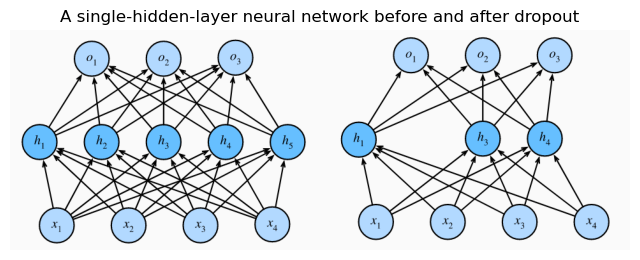

In [3]:
img = Image.open('./Figures/Dropout.png')
fig, ax = plt.subplots(figsize=(8, 4),dpi=100)
ax.imshow(img)
ax.axis('off')
ax.set_title("A single-hidden-layer neural network before and after dropout")
plt.show()

### Informal Explanation
- The original paper argue that neural network overfitting is characterized by a state in which each layer relies on a specific pattern of activations in the previous layer, calling this condition *co-adaptation*. Dropout is claimed to break up co-adaptation


- Can be thought of as a method to making **bagging** practical for ensembles of very many large neural networks
    - Trains the ensemble consisting of all subnetworks that can be formed by removing nonoutput units from an underlying base network
    

- Dropout training is not quite the same as bagging training
    - In the case of bagging, the models are all independent. In the case of dropout, the models share parameters, with each model inheriting a different **subset of parameters** from the parent neural network
    - This parameter sharing makes it possible to represent an exponential number of models with a tractable amount of memory
    

- The stochasticity is **not necessary nor sufficient** to achieve the regularizing effect of dropout
    - Stochasticity is just a means of approximating the sum over all submodels
    - The interpretation of dropout as bagging has value beyond the interpretation of dropout as robustness to noise
    - The key is training a network with stochastic behavior and making predictions by averaging over multiple stochastic decisions
    - The noises are injected to hidden units, which can be viewed as a form of highly intelligent, adaptive destruction of the **information content of the input** rather than destruction of the raw values of the input
    - The **noise is multiplicative**, which do not allow learning to have very large parameter values to make the noise insignificant when the noises are simply added to the parameter values.

### Remark
- A **computationally inexpensive but powerful** method of regularizing **a broad family of models** and can be used alone or with other forms of regularization strategies. It has become a standard technique for training neural networks
    - **Computationally Cheap**: The cost per step of applying dropout to a specific model is negligible
    - **More effective than other standard computationally inexpensive regularizers** such as weight decay, filter norm constraints and sparse activity regularization
    - It does not significantly limit the type of model or training procedure that can be used
        - Multilayer Perceptions, Probabilistic Models, Recurrent Neural Networks, ...
   
   
- Although it is computationally cheap, the cost of **using dropout in a complete system** can be significant
    - The validation error is much lower when using dropout, but at the cost of **a much larger model** and **many more iterations** of the training algorithm
    - For very large dataset, the computational cost of using dropout and larger models may outweigh the benefit of regularization
 
 
- Less effective when **extremely few** labeled training examples are available. When additional unlabeled data is available, unsupervised feature learning can gain an advantage over dropout


- When applied to linear regression, dropout is equivalent to $L^2$ weight decay, with a different weight decay coefficient for each input feature. The magnitude of each feature's weight decay coefficient is determined by its variance.
    - For deep models, dropout is not equivalent to weight decay

## Other Methods
### Semi-Supervised Learning
- Both unlabeled examples from $P(\mathbf{x})$ and labeled examples from $P(\mathbf{x},\mathbf{y})$ are used to predict $\mathbf{y}$ from $\mathbf{x}$
    - First use unsupervised learning to group examples in representation space
    - Learn a representation so that examples from the same class have similar representations
    - Examples that cluster tightly in the input space should be mapped to similar representations
    
### Multi-task Learning
- Improve generalization by polling the examples arising out of several tasks


- When part of a model is shared across tasks, that part of the model is more constrained toward good values, often yielding better generalization


- Works only if the assumptions about the statistical relationship between the different tasks are valid, meaning that there is something shared across some of the tasks

### Sparse Representations
- Like $L^1$ penalization induces a sparse parametrization, representational sparsity describes a representation where many of the elements of the elements of the representation are zero or close to zero


- **Penalty Method**: Define a sparsity representation $\mathbf{h}$ of the data $\mathbf{x}$ and apply $L^1 $norm penalty regularization $$\Omega\left(\mathbf{h}\right)=\|\mathbf{h}\|_1$$
    - Not the only choice for sparsity representation by penalty
    
    
- Other methods obtain representational sparsity with a hard constraint on the activation values like **orthogonal matching pursuit**

### Adversarial Training
- Intensionally construct some **adversarial examples** by using an optimization procedure to search for an input $\mathbf{x}'$ near a data point $\mathbf{x}$ such that the model output is very different at $\mathbf{x}'$
    - In many cases, $\mathbf{x}'$ can be so similar to $\mathbf{x}$ that a human observer cannot tell the differences but the network can make highly different predictions
    
    
- Training on adversarially perturbed examples from the training set can reduce the error rate on the original i.i.d. test set


- Adversarial training encourages the network to be **locally constant** in the neighborhood of the training data. That is to say, finds inputs near the original inputs and trains the model to produce the same output on these as on the original inputs.